In [1295]:
#data ingestion
#EDA
#preprocessing
#model building
#evaluatoion

In [1296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1297]:
data=pd.read_csv('TSLA.csv')

In [1298]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [1299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [1300]:
# insights>> no null values, object, float and int data type feature present

In [1301]:
data.shape

(2956, 7)

In [1302]:
data.head().T

,0,1,2,3,4
Date,2010-06-29,2010-06-30,2010-07-01,2010-07-02,2010-07-06
Open,3.8,5.158,5.0,4.6,4.0
High,5.0,6.084,5.184,4.62,4.0
Low,3.508,4.66,4.054,3.742,3.166
Close,4.778,4.766,4.392,3.84,3.222
Adj Close,4.778,4.766,4.392,3.84,3.222
Volume,93831500,85935500,41094000,25699000,34334500


In [1303]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [1304]:
stock_data=data[['Date', 'Close']]

In [1305]:
stock_data

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [1306]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [1307]:
# convert date object to datetime format

In [1308]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [1309]:
stock_data

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [1310]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2956 non-null   datetime64[ns]
 1   Close   2956 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.3 KB


In [1311]:
stock_data.set_index('Date', inplace=True)

In [1312]:
stock_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [1313]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2956 non-null   float64
dtypes: float64(1)
memory usage: 46.2 KB


In [1314]:
# time series data and tradition data >> the difference is time series has a time component
# therefor datetime column should be index
# slicing of data on date columns becomes easy
# visulization is simple
# libraries related to forecasting modes assumes that there is a time/date column

In [1315]:
# steps: 
# step1: summany >> mean, median, mode
# step2> visualization the time series data, rolling mean and standard deviation, trend and noise
# decomposition of time series
# step3> statinarity cheak > visulation or staticstical test(ADF)
# step 4> ACF and PACF
# step 5 > outliers

In [1316]:
stock_data.describe()

,Close
count,2956.000000
mean,138.762183
std,250.123115
min,3.160000
25%,19.615000
50%,46.545000
75%,68.103998
max,1229.910034


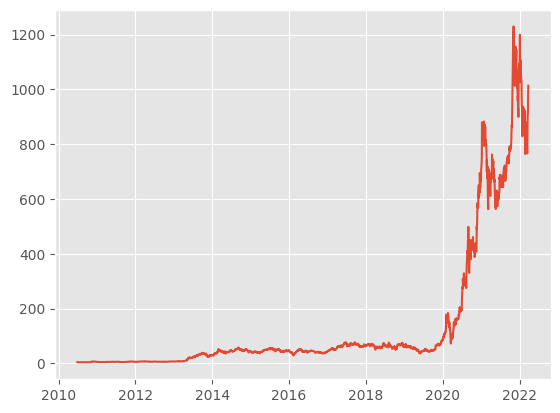

In [1317]:
plt.plot(stock_data.Close)

In [1318]:
# till 2019 the data is allmost constent so for learning purpose and visuliation i am taking only data after 2019

In [1319]:
stock_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [1320]:
stock_data=stock_data.loc['2019-06-01':, : ]

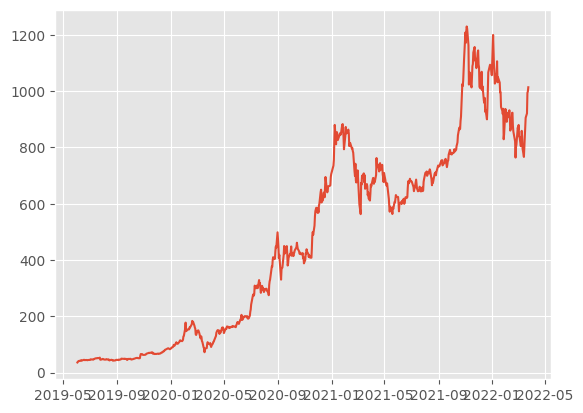

In [1321]:
plt.plot(stock_data.Close)

In [1322]:
stock_data.describe()

,Close
count,710.000000
mean,465.510892
std,344.040105
min,35.793999
25%,109.352998
50%,438.880004
75%,733.960022
max,1229.910034


(array([220.,  57.,  38.,  59.,  50., 121.,  75.,  33.,  43.,  14.]),
 array([  35.793999 ,  155.2056025,  274.617206 ,  394.0288095,
         513.440413 ,  632.8520165,  752.26362  ,  871.6752235,
         991.086827 , 1110.4984305, 1229.910034 ]),
 <BarContainer object of 10 artists>)

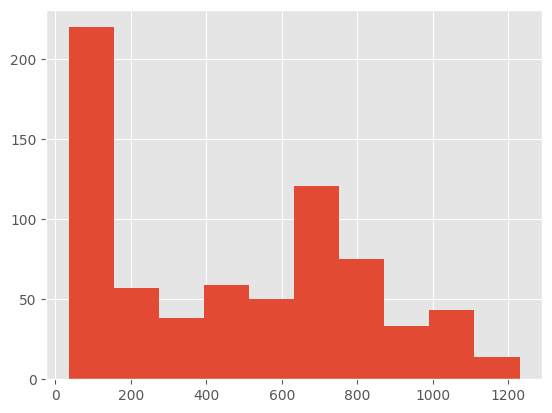

In [1323]:
plt.hist(stock_data.Close)

Text(0.5, 1.0, 'Tesla Stock Closing Price')

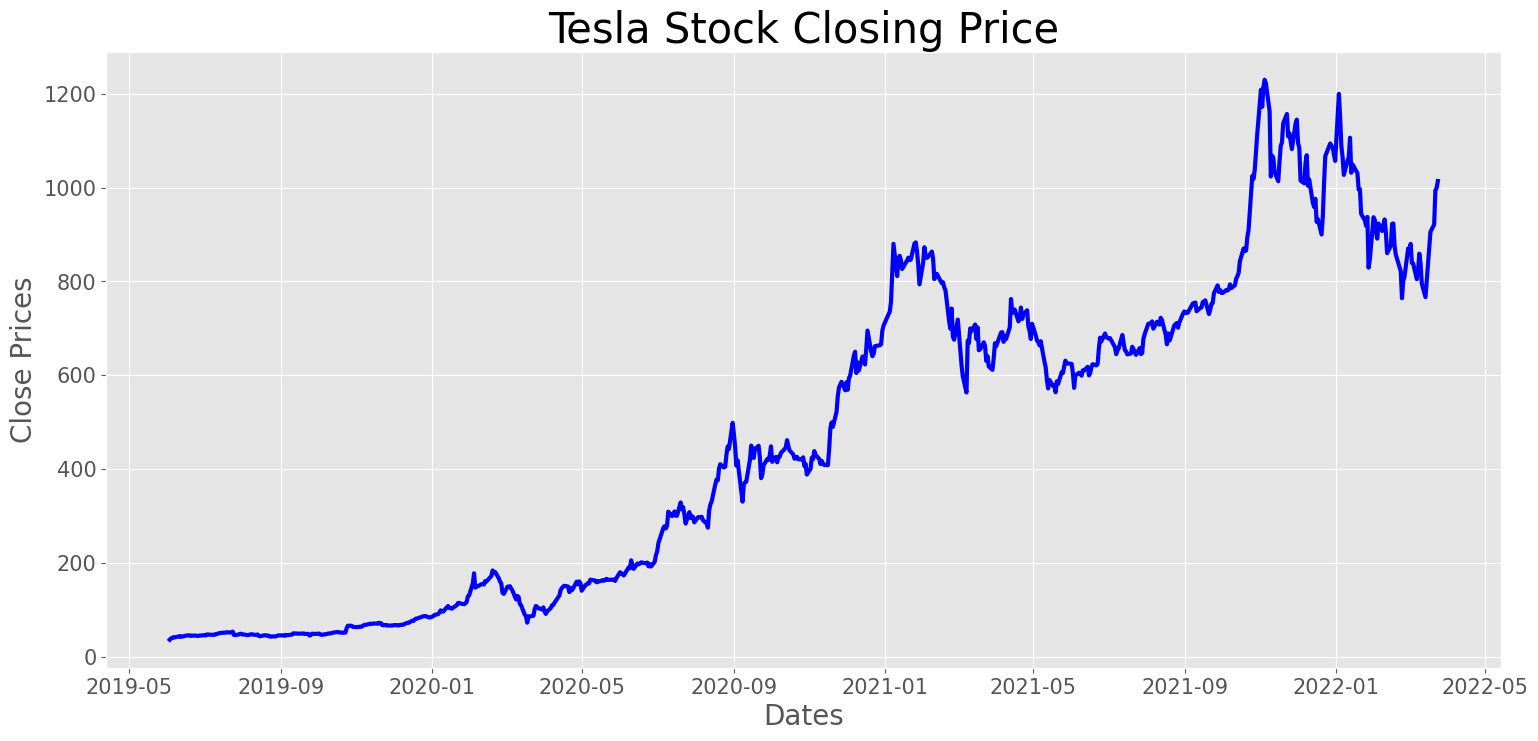

In [1324]:
# line chart for closing price: 
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price', fontsize=30)

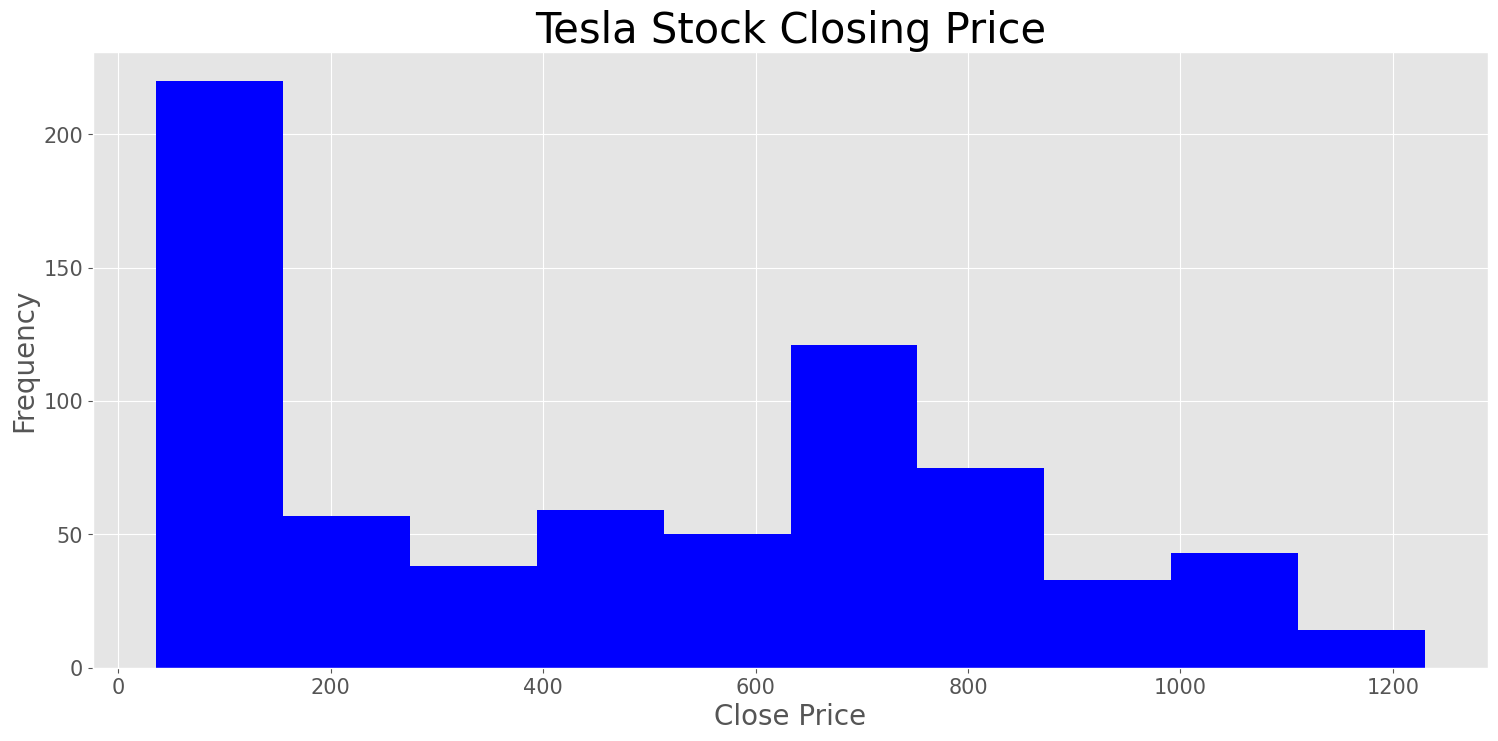

In [1325]:
#histogram
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Close Price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

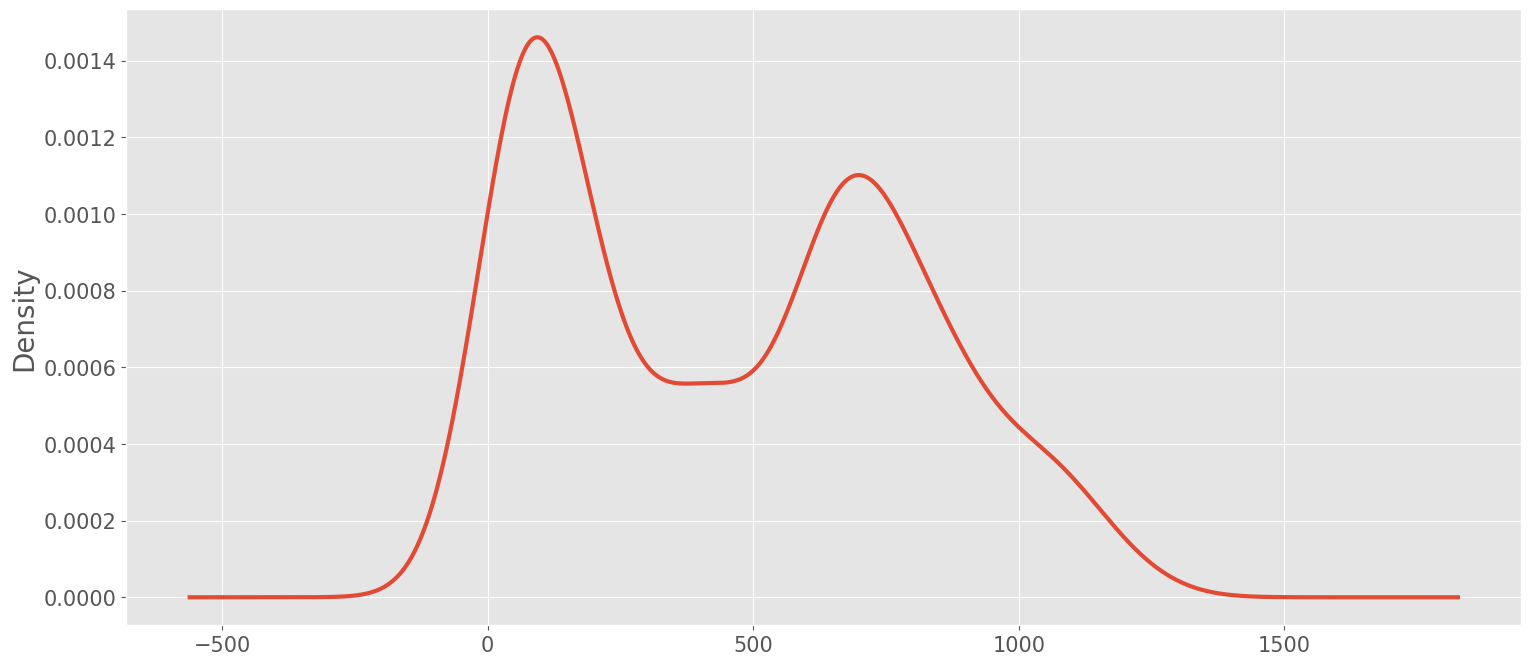

In [1326]:
# distribution plot of closing price
#distribution plot of closing price
df_close = stock_data["Close"]
df_close.plot(kind = 'kde', figsize = (18, 8), linewidth = 3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize=15)

plt.show()

In [1327]:
rolling_mean=stock_data['Close'].rolling(48).mean()
rolling_std=stock_data['Close'].rolling(48).std()

In [1328]:
rolling_mean

Date
2019-06-03           NaN
2019-06-04           NaN
2019-06-05           NaN
2019-06-06           NaN
2019-06-07           NaN
                 ...    
2022-03-18    897.957291
2022-03-21    895.103957
2022-03-22    893.636873
2022-03-23    891.405415
2022-03-24    891.037913
Name: Close, Length: 710, dtype: float64

In [1329]:
rolling_std

Date
2019-06-03          NaN
2019-06-04          NaN
2019-06-05          NaN
2019-06-06          NaN
2019-06-07          NaN
                ...    
2022-03-18    80.949736
2022-03-21    77.525547
2022-03-22    74.874631
2022-03-23    69.830476
2022-03-24    69.119984
Name: Close, Length: 710, dtype: float64

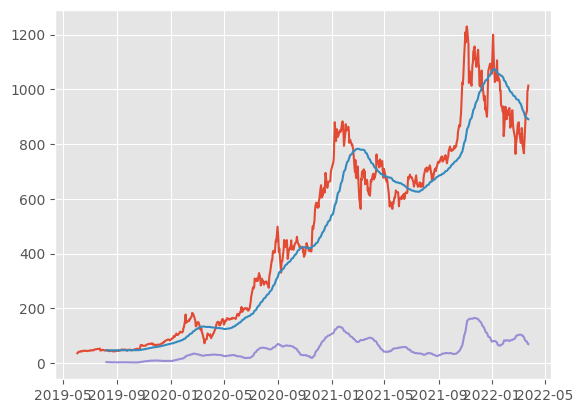

In [1330]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)   # for smothing
plt.plot(rolling_std)


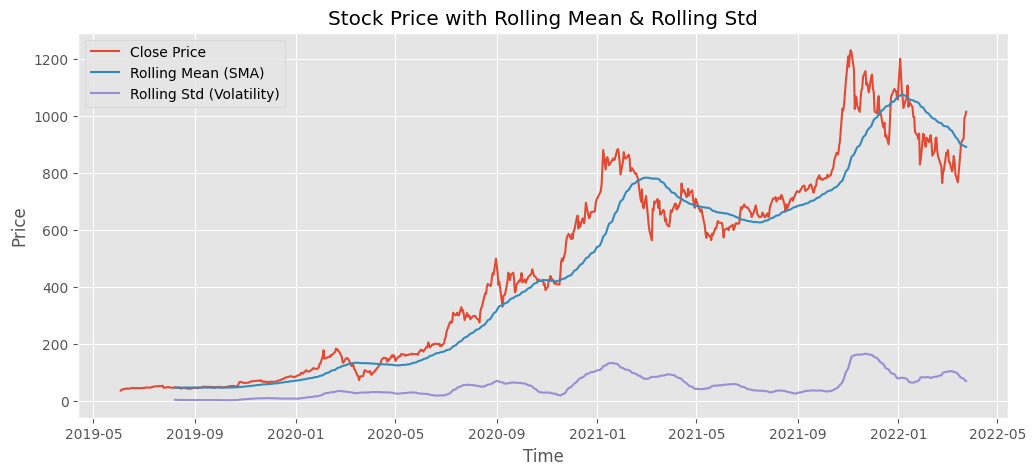

In [1331]:
plt.figure(figsize=(12,5))

plt.plot(stock_data.Close, label='Close Price')
plt.plot(rolling_mean, label='Rolling Mean (SMA)')
plt.plot(rolling_std, label='Rolling Std (Volatility)')

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price with Rolling Mean & Rolling Std")

plt.legend()
plt.grid(True)

plt.show()


In [1332]:
# from the plot above, it si clear that time series is non stationary
# lets reverify by statistial test as well >> ADF test

In [1333]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['Close'])

In [1334]:
adft

# H0: time series is not stationary
# Ha: time series is stationary

# if p_value<=0.05 reject H0



# here p value= 0.871 > 0.05 >>> accept H0 >>> time series is not stationary

(-0.5991534609188872,
 0.8711731953098122,
 0,
 709,
 {'1%': -3.439606888036868,
  '5%': -2.865625121924057,
  '10%': -2.5689454046801052},
 6280.993347921293)

In [1335]:
pd.Series(adft[0:4], index = ["test_statistics", "p-value", 'lag', 'no of data points'])

test_statistics       -0.599153
p-value                0.871173
lag                    0.000000
no of data points    709.000000
dtype: float64

In [1336]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


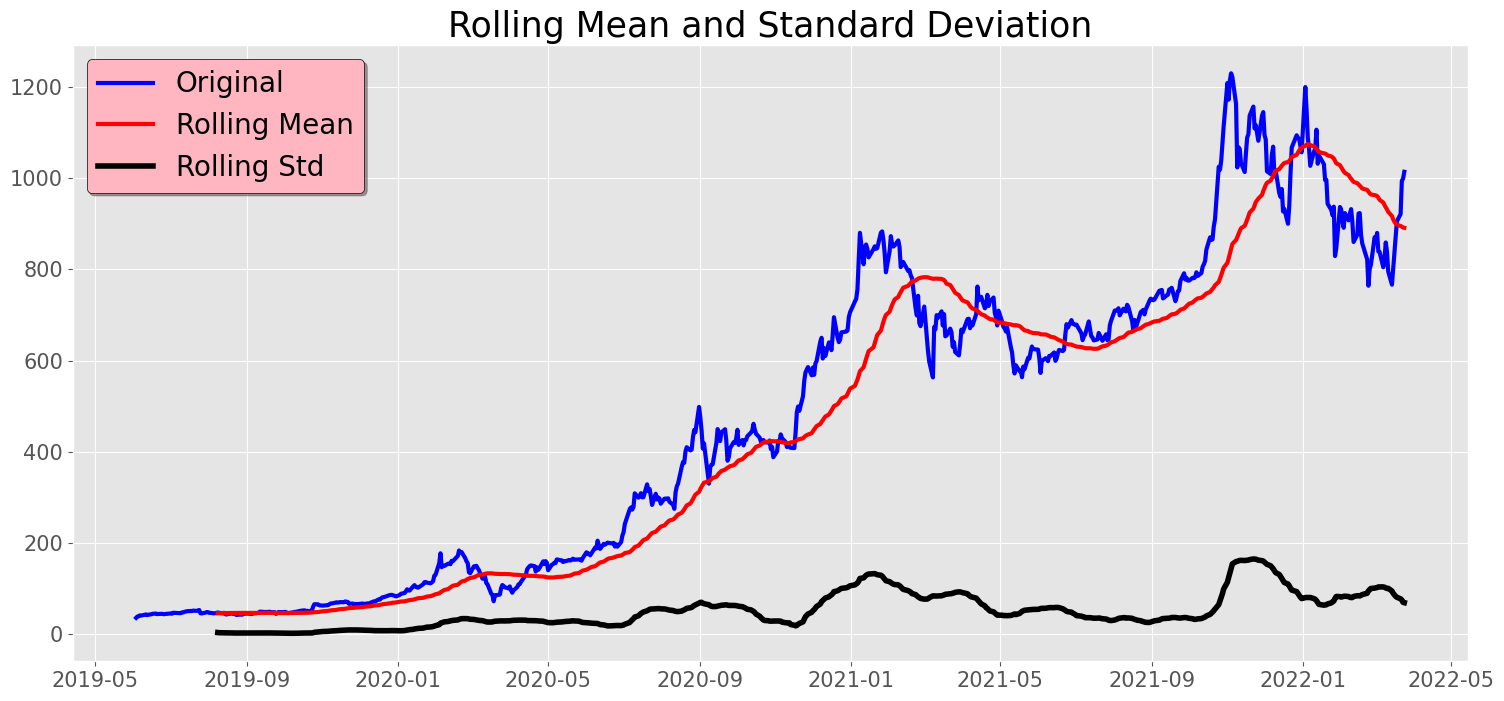

Results of dickey fuller test
Test Statistics                 -0.599153
p-value                          0.871173
No. of lags used                 0.000000
Number of observations used    709.000000
critical value (1%)             -3.439607
critical value (5%)             -2.865625
critical value (10%)            -2.568945
dtype: float64


In [1337]:
test_stationarity(stock_data.Close)

In [1338]:
#A time series is made up of level, trend, seasonalit, noise
#time series is of two types>> additive and multiplicative

In [1339]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12) #for 12 months


# We do seasonal decomposition to break the time series into trend, seasonality, and noise so we can understand its patterns and prepare it correctly for forecasting models like ARIMA/SARIMA.

# Basically:
# 👉 See trend
# 👉 See repeating seasonality
# 👉 See noise
# 👉 Decide how to make the series stationary

In [1340]:
result.seasonal

Date
2019-06-03    5.072375
2019-06-04    4.195126
2019-06-05    3.248815
2019-06-06    1.071271
2019-06-07   -3.195383
                ...   
2022-03-18   -1.901852
2022-03-21   -3.577375
2022-03-22    0.068363
2022-03-23    5.072375
2022-03-24    4.195126
Name: seasonal, Length: 710, dtype: float64

<Figure size 2000x1000 with 0 Axes>

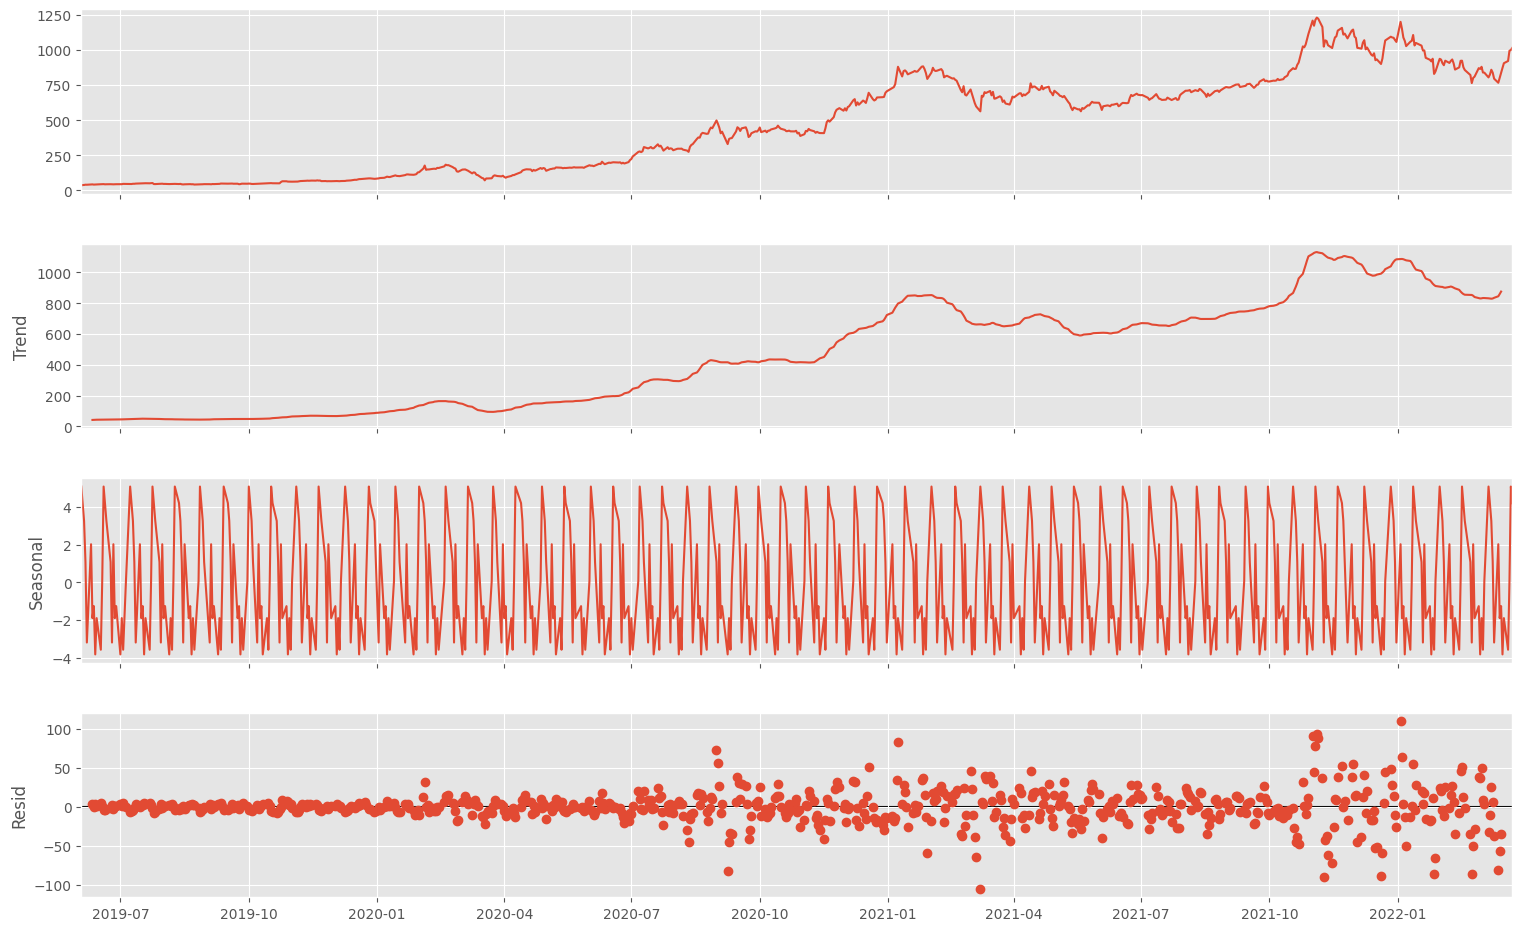

In [1341]:
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

✅ Insights from the Decomposition
1. Trend → Strong Upward Growth

The price keeps rising from 2019 to 2022.
👉 Shows long-term upward trend → not stationary.

2. Seasonality → Repeating Patterns

The seasonal component repeats in a very regular cycle.
👉 Shows strong seasonality.

3. Residual → Mostly Random Noise

Most noise is centered around zero, with occasional spikes.
👉 After removing trend & seasonality, what's left is random.

🎯 Overall Insight

Your time series has:

Clear upward trend

Strong seasonality

Random residual noise

So the series is not stationary and needs SARIMA (seasonal ARIMA) for forecasting.

<Figure size 2000x1000 with 0 Axes>

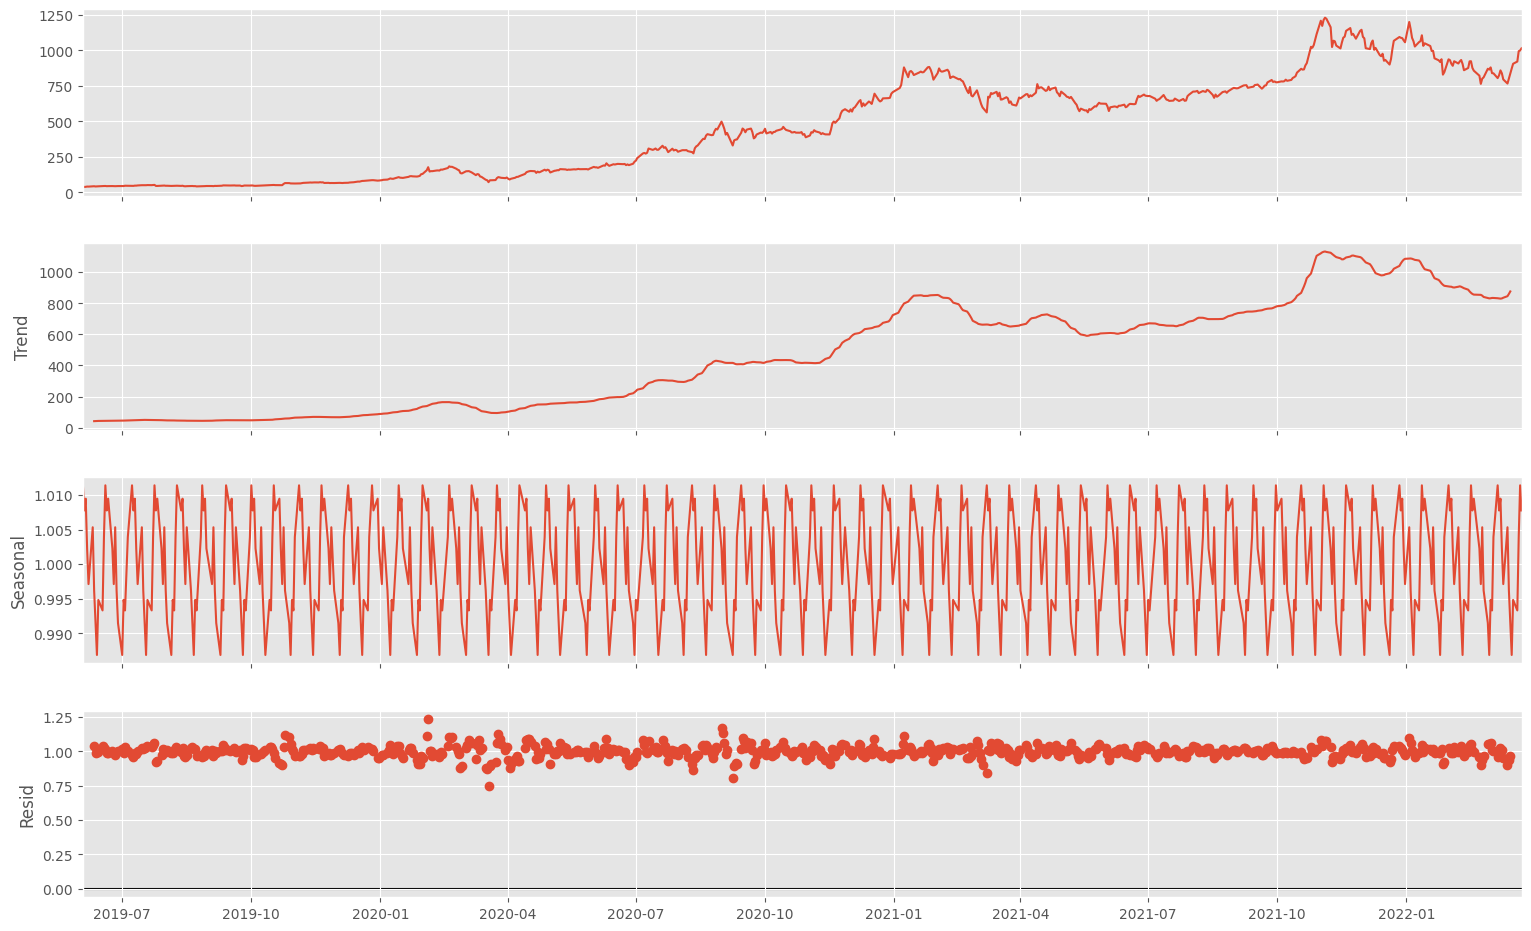

In [1342]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12, model = "mutiplicative")
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

<Axes: ylabel='Close'>

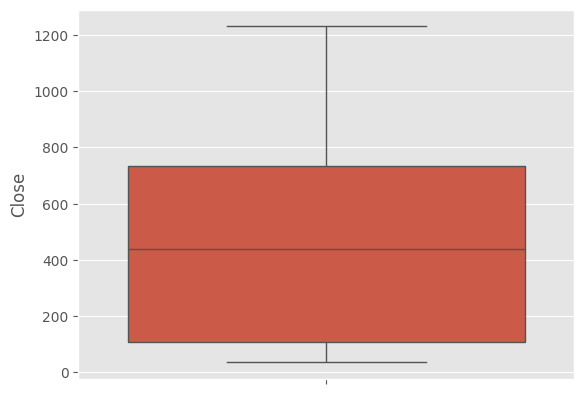

In [1343]:
sns.boxplot(stock_data.Close)

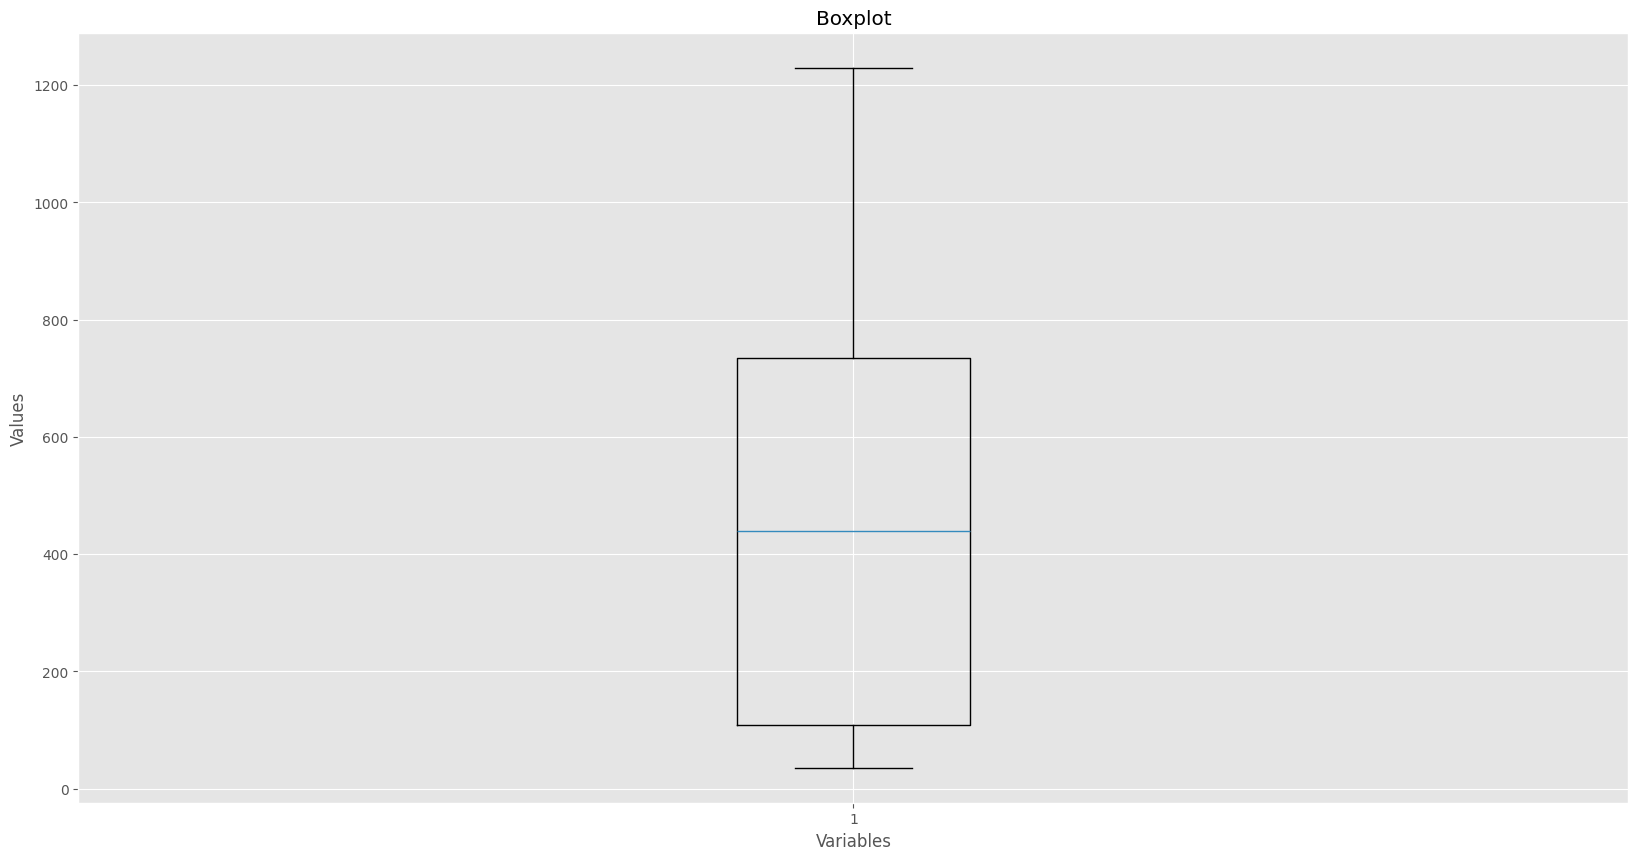

In [1344]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(stock_data["Close"])
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot')
plt.show()

In [1345]:
# no outliers

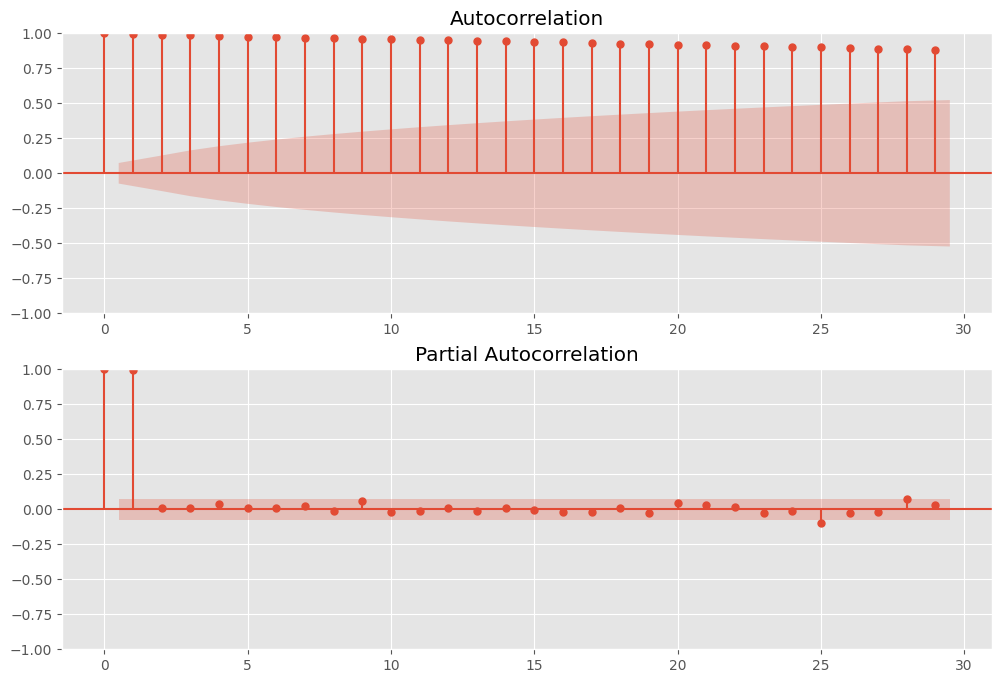

In [1346]:
# ACF/PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fit, axes=plt.subplots(2, 1, figsize=(12, 8))
plot_acf(stock_data, ax=axes[0])
plot_pacf(stock_data, ax=axes[1])
plt.show()
#since series is non stationary, results are not good

✅ 1. ACF (Autocorrelation)

The ACF values stay very high for many lags (slow decay).

This is a classic sign of non-stationary time series.

Trending series always show this “tailing off” behavior.

👉 Conclusion: The series is not stationary, so ARIMA cannot be applied directly.
You need differencing (d = 1).

✅ 2. PACF (Partial Autocorrelation)

The PACF has a strong spike at lag 1.

After lag 1, the remaining lags are almost zero.

👉 Conclusion: This pattern indicates a possible AR(1) component.

🎯 Overall Interpretation (Short)

ACF tailing off → needs differencing → d = 1

PACF has one big spike → AR(1) → p = 1

This suggests an ARIMA(1,1,0) model after differencing.

In [1347]:
#To make time series stationary>> differencing
df_close = df_close.diff()
df_close = df_close.dropna()


df_close


Date
2019-06-04     2.926002
2019-06-05     0.598000
2019-06-06     1.871998
2019-06-07    -0.289997
2019-06-10     1.675998
                ...    
2022-03-18    33.790039
2022-03-21    15.769958
2022-03-22    72.820007
2022-03-23     5.130005
2022-03-24    14.809998
Name: Close, Length: 709, dtype: float64

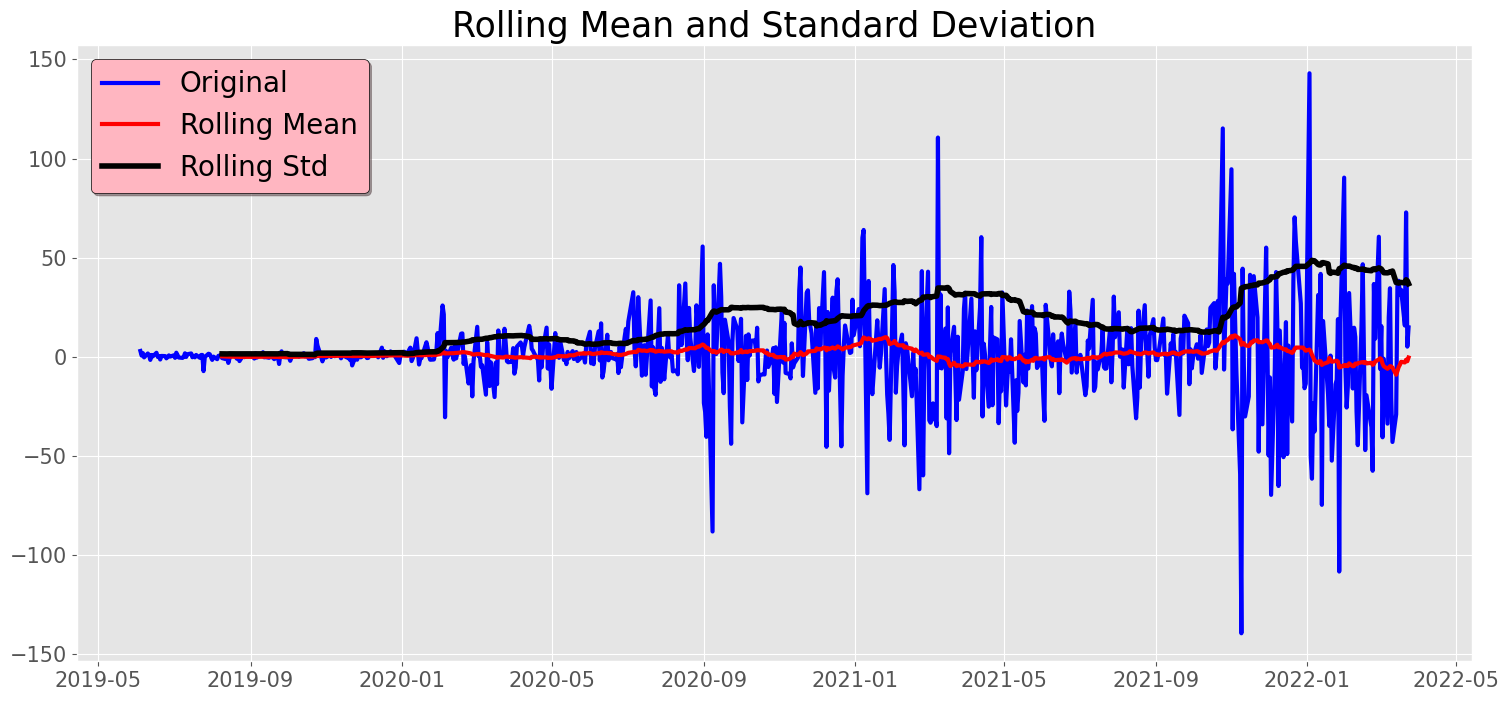

Results of dickey fuller test
Test Statistics                -26.911386
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    708.000000
critical value (1%)             -3.439620
critical value (5%)             -2.865631
critical value (10%)            -2.568948
dtype: float64


In [1348]:
#now check again the stationarity
test_stationarity(df_close)

✅ 1. Trend is removed → Mean is almost flat

The red rolling mean line stays close to zero throughout the series.
This means:

👉 Differencing successfully removed the upward trend.
👉 The series is now closer to stationary in terms of mean.

✅ 2. Variance is more stable, but not perfect

The black rolling standard deviation becomes much more stable than before, but:

In the middle and end (2021–2022), variance increases

Some large spikes still appear

👉 Variance is more stable, but still slightly heteroscedastic (especially in volatile periods).

✅ 3. Differenced series now oscillates around zero

The blue line (differenced data):

Moves above and below zero frequently

No obvious long-term trend

Typical behavior of a stationary-like series

👉 This is what ARIMA needs.

✅ 4. The series is almost stationary

After differencing:

Mean = stable

Trend = gone

Variance = improved

You can confirm with ADF test, but visually it is near-stationary.

🎯 Final Insight

First differencing worked well.
Your time series is now much closer to stationary, and suitable for:

ARIMA

SARIMA (if seasonality remains)

In [1349]:
# now p value is less than 0.05 , reject the null hypothesis >> time series is statiionary , if not stationary, then again you need to differencing

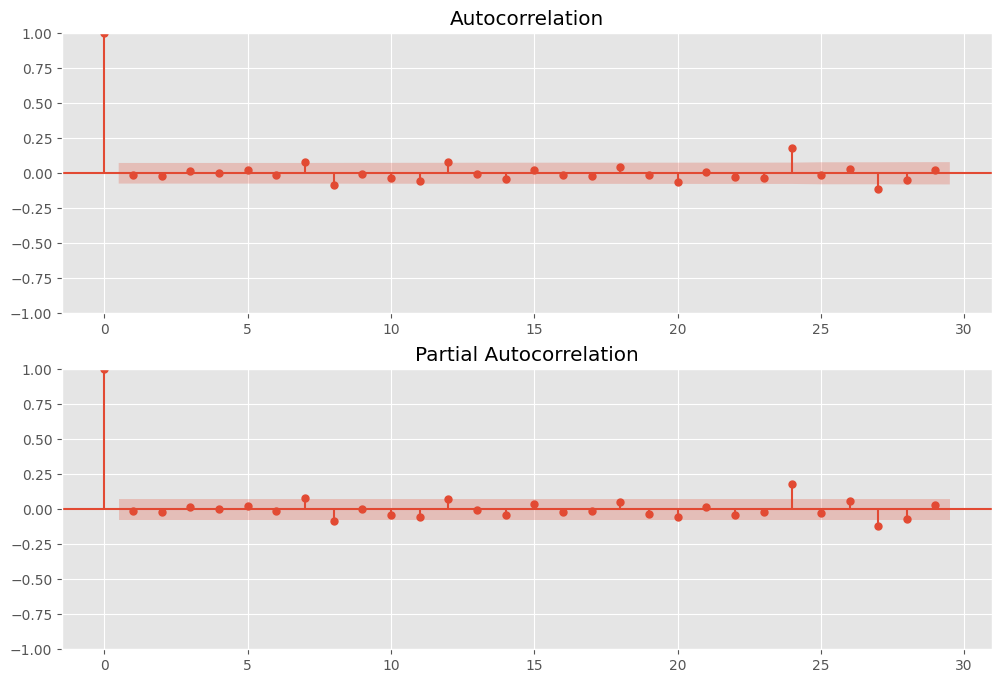

In [1350]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(df_close, ax = axes[0])
plot_pacf(df_close, ax = axes[1])
plt.show()

✅ 1. ACF Interpretation

ACF drops to near zero immediately after lag 0

No significant spikes beyond lag 1

No slow decay

👉 This means there is no strong MA pattern.
👉 Suggests q = 0 (or maybe q = 1 at most).

✅ 2. PACF Interpretation

PACF also drops instantly after lag 0

No significant spikes beyond lag 1

Very clean cut-off

👉 This means no strong AR pattern.
👉 Suggests p = 0 (or maybe p = 1 at most).

🎯 Final Model Suggestion (Best Fit)

Since both ACF and PACF cut off immediately:

✔ ARIMA(0,1,0)

In [1351]:
#in time series data, train test split happens based on tim index

df_close

Date
2019-06-04     2.926002
2019-06-05     0.598000
2019-06-06     1.871998
2019-06-07    -0.289997
2019-06-10     1.675998
                ...    
2022-03-18    33.790039
2022-03-21    15.769958
2022-03-22    72.820007
2022-03-23     5.130005
2022-03-24    14.809998
Name: Close, Length: 709, dtype: float64

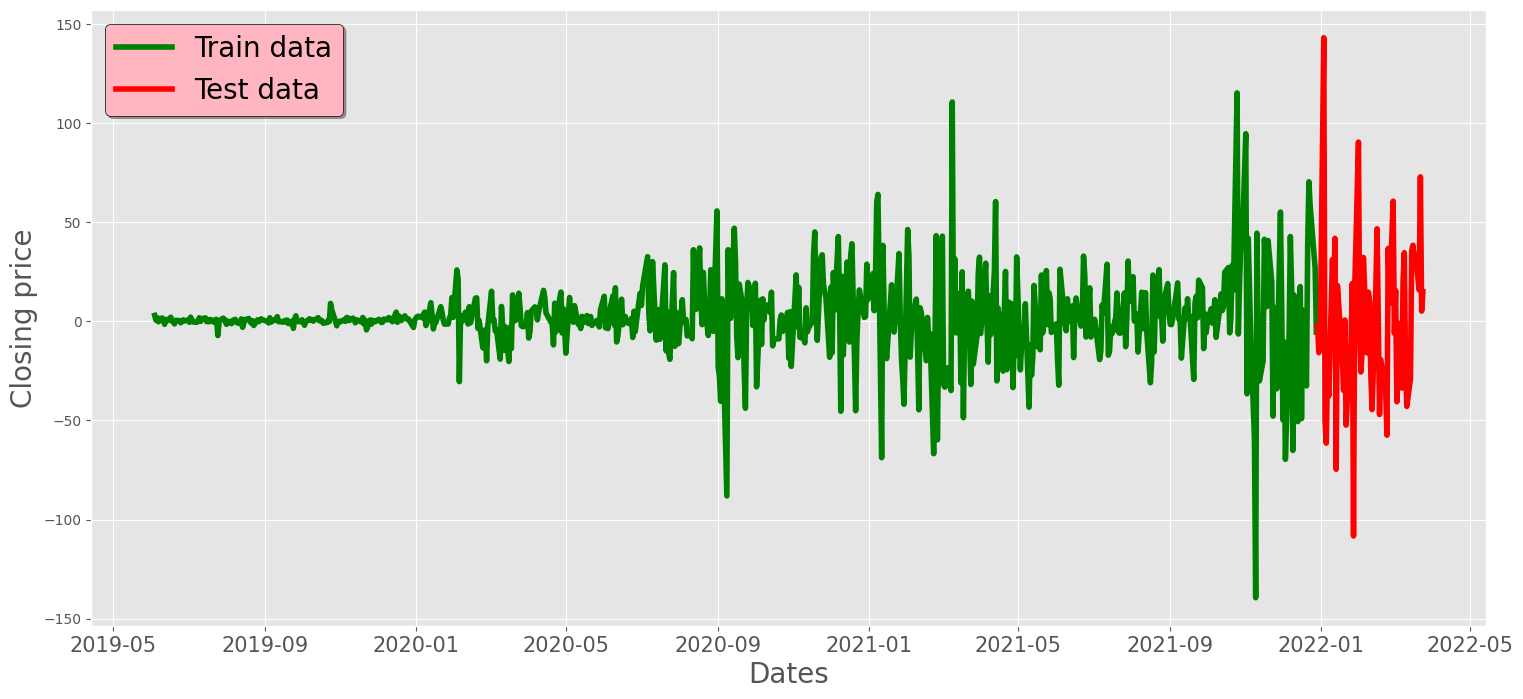

In [1352]:
train_data = df_close[0:-60]
test_data = df_close[-60:]

train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing price', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

In [1353]:

train_data.shape, test_data.shape

((649,), (60,))

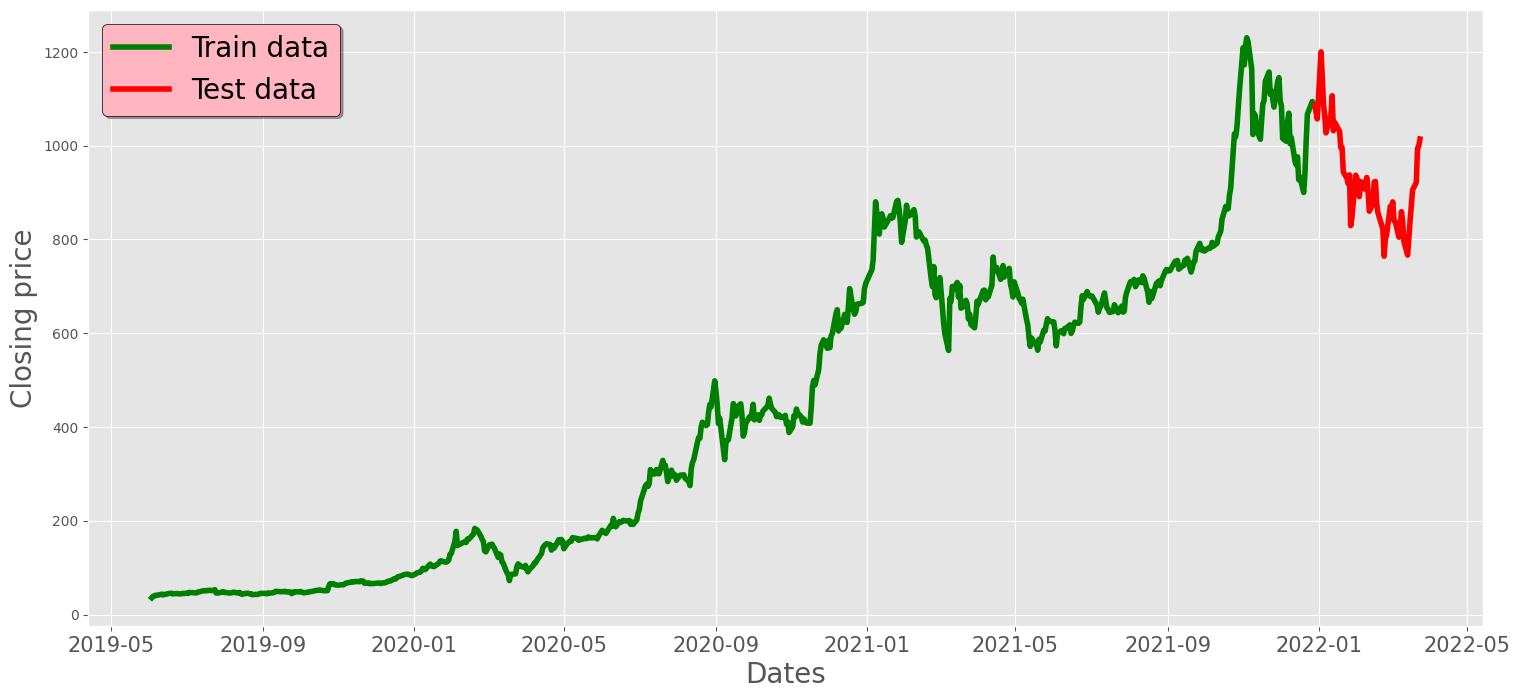

In [1354]:
#Now since we will use ARIMA, we dont need stationary time series data
#why> ARIMA itself has inherent differencing parameter, which will make the series stationary
#I>> integrated
#we will use original time series data

train_data = stock_data[0:-60]
test_data = stock_data[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing price', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

In [1355]:
#model building
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [1356]:
train_data

,Close
Date,
2019-06-03,35.793999
2019-06-04,38.720001
2019-06-05,39.318001
2019-06-06,41.189999
2019-06-07,40.900002
...,...
2021-12-21,938.530029
2021-12-22,1008.869995
2021-12-23,1067.000000


In [1357]:
test_data.shape

(60, 1)

In [1358]:
history = train_data['Close']

In [1359]:
history

Date
2019-06-03      35.793999
2019-06-04      38.720001
2019-06-05      39.318001
2019-06-06      41.189999
2019-06-07      40.900002
                 ...     
2021-12-21     938.530029
2021-12-22    1008.869995
2021-12-23    1067.000000
2021-12-27    1093.939941
2021-12-28    1088.469971
Name: Close, Length: 650, dtype: float64

In [1360]:
model=ARIMA(history, order=(1, 1, 1))

In [1361]:
model=model.fit()

In [1362]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  650
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2872.104
Date:                Tue, 09 Dec 2025   AIC                           5750.209
Time:                        11:04:03   BIC                           5763.635
Sample:                             0   HQIC                          5755.417
                                - 650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0097      8.384     -0.001      0.999     -16.442      16.423
ma.L1          0.0064      8.378      0.001      0.999     -16.414      16.427
sigma2       408.5427     10.374     39.380      0.000     388.209     428.876
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1924.82
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              28.23   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1363]:
model.forecast()  # #predict is used for a range of values

650    1088.488078
dtype: float64

In [1364]:
model.forecast()

650    1088.488078
dtype: float64

In [1365]:
test_data = test_data['Close']
test_data

Date
2021-12-29    1086.189941
2021-12-30    1070.339966
2021-12-31    1056.780029
2022-01-03    1199.780029
2022-01-04    1149.589966
2022-01-05    1088.119995
2022-01-06    1064.699951
2022-01-07    1026.959961
2022-01-10    1058.119995
2022-01-11    1064.400024
2022-01-12    1106.219971
2022-01-13    1031.560059
2022-01-14    1049.609985
2022-01-18    1030.510010
2022-01-19     995.650024
2022-01-20     996.270020
2022-01-21     943.900024
2022-01-24     930.000000
2022-01-25     918.400024
2022-01-26     937.409973
2022-01-27     829.099976
2022-01-28     846.349976
2022-01-31     936.719971
2022-02-01     931.250000
2022-02-02     905.659973
2022-02-03     891.140015
2022-02-04     923.320007
2022-02-07     907.340027
2022-02-08     922.000000
2022-02-09     932.000000
2022-02-10     904.549988
2022-02-11     860.000000
2022-02-14     875.760010
2022-02-15     922.429993
2022-02-16     923.390015
2022-02-17     876.349976
2022-02-18     856.979980
2022-02-22     821.530029
2022-02

In [1366]:
[test_data[0]], model.forecast()

([1086.189941],
 650    1088.488078
 dtype: float64)

In [1367]:
mean_squared_error([test_data[0]], model.forecast())

5.281433986464254

In [1368]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

2.298137068685037

In [1369]:
#we can treat p, d, q as hyperparameter
p_values = range(0, 3)
d_values =  range(0, 3)
q_values = range(0, 3)

for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [1370]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['Close']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [1371]:
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=495.662
ARIMA(0, 0, 1) RMSE=257.960
ARIMA(0, 0, 2) RMSE=179.291
ARIMA(0, 1, 0) RMSE=41.102
ARIMA(0, 1, 1) RMSE=41.168
ARIMA(0, 1, 2) RMSE=41.355
ARIMA(0, 2, 0) RMSE=58.835
ARIMA(0, 2, 1) RMSE=41.211
ARIMA(0, 2, 2) RMSE=41.275
ARIMA(1, 0, 0) RMSE=41.081
ARIMA(1, 0, 1) RMSE=41.118
ARIMA(1, 0, 2) RMSE=41.330
ARIMA(1, 1, 0) RMSE=41.172
ARIMA(1, 1, 1) RMSE=41.208
ARIMA(1, 1, 2) RMSE=41.644
ARIMA(1, 2, 0) RMSE=52.940
ARIMA(1, 2, 1) RMSE=41.278
ARIMA(1, 2, 2) RMSE=41.251
ARIMA(2, 0, 0) RMSE=41.138
ARIMA(2, 0, 1) RMSE=41.231
ARIMA(2, 0, 2) RMSE=41.382
ARIMA(2, 1, 0) RMSE=41.347
ARIMA(2, 1, 1) RMSE=41.614
ARIMA(2, 1, 2) RMSE=40.889
ARIMA(2, 2, 0) RMSE=50.121
ARIMA(2, 2, 1) RMSE=41.438
ARIMA(2, 2, 2) RMSE=41.493
Best ARIMA(2, 1, 2) RMSE=40.889


In [ ]:
# ARIMA(0, 1, 0) RMSE=41.102   generally best 

# but according to this Best ARIMA(2, 1, 2) RMSE=40.889 not much more difference that's why take simpler

In [1372]:
history = [x for x in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 41.10154455200388


In [ ]:

# alpha = 0.05 → 95% confidence

# You are 95% sure the future value lies between the lower and upper bounds given by the model.

# 5% chance the actual value will fall outside that range.

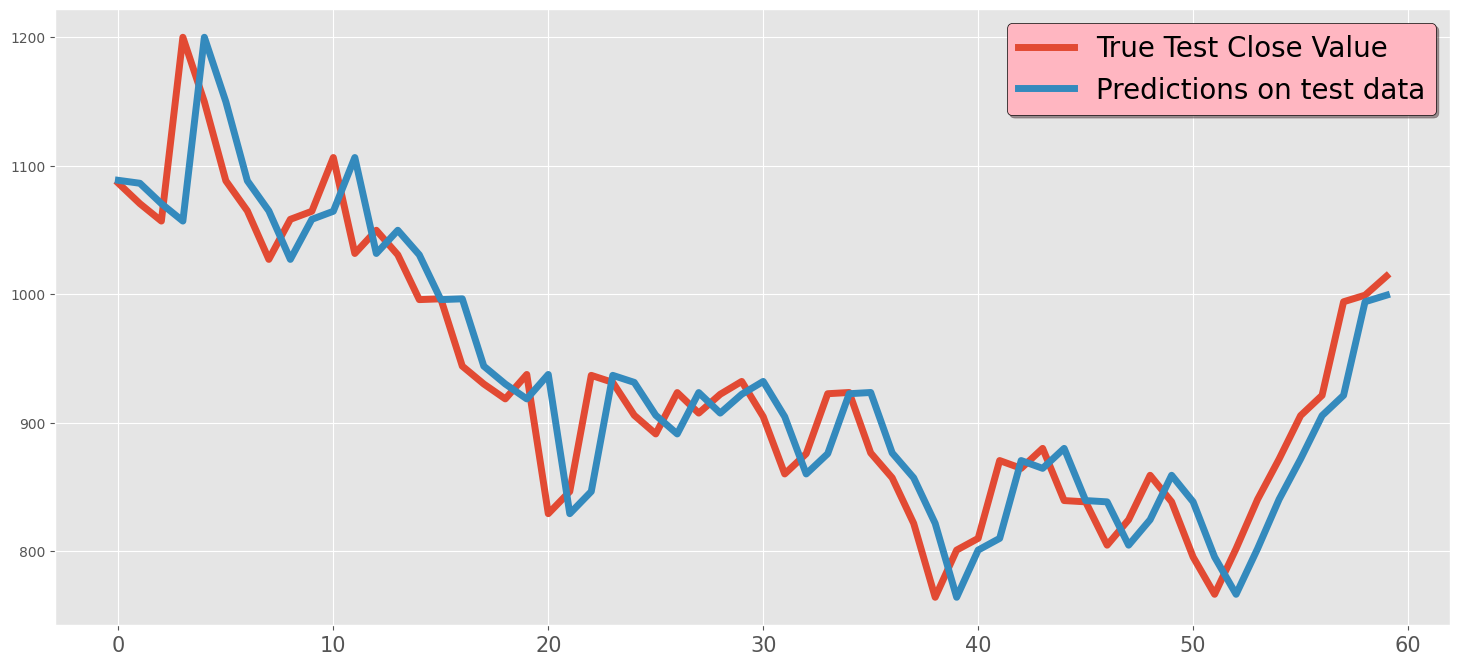

In [1374]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [1375]:

fc_series = pd.Series(predictions, index=test_data.index)

In [1376]:
fc_series

Date
2021-12-29          [1088.469971]
2021-12-30          [1086.189941]
2021-12-31          [1070.339966]
2022-01-03          [1056.780029]
2022-01-04          [1199.780029]
2022-01-05          [1149.589966]
2022-01-06          [1088.119995]
2022-01-07          [1064.699951]
2022-01-10          [1026.959961]
2022-01-11          [1058.119995]
2022-01-12          [1064.400024]
2022-01-13          [1106.219971]
2022-01-14          [1031.560059]
2022-01-18          [1049.609985]
2022-01-19           [1030.51001]
2022-01-20    [995.6500240000001]
2022-01-21            [996.27002]
2022-01-24           [943.900024]
2022-01-25                [930.0]
2022-01-26           [918.400024]
2022-01-27           [937.409973]
2022-01-28           [829.099976]
2022-01-31           [846.349976]
2022-02-01           [936.719971]
2022-02-02               [931.25]
2022-02-03           [905.659973]
2022-02-04           [891.140015]
2022-02-07           [923.320007]
2022-02-08           [907.340027]
2022-02-0

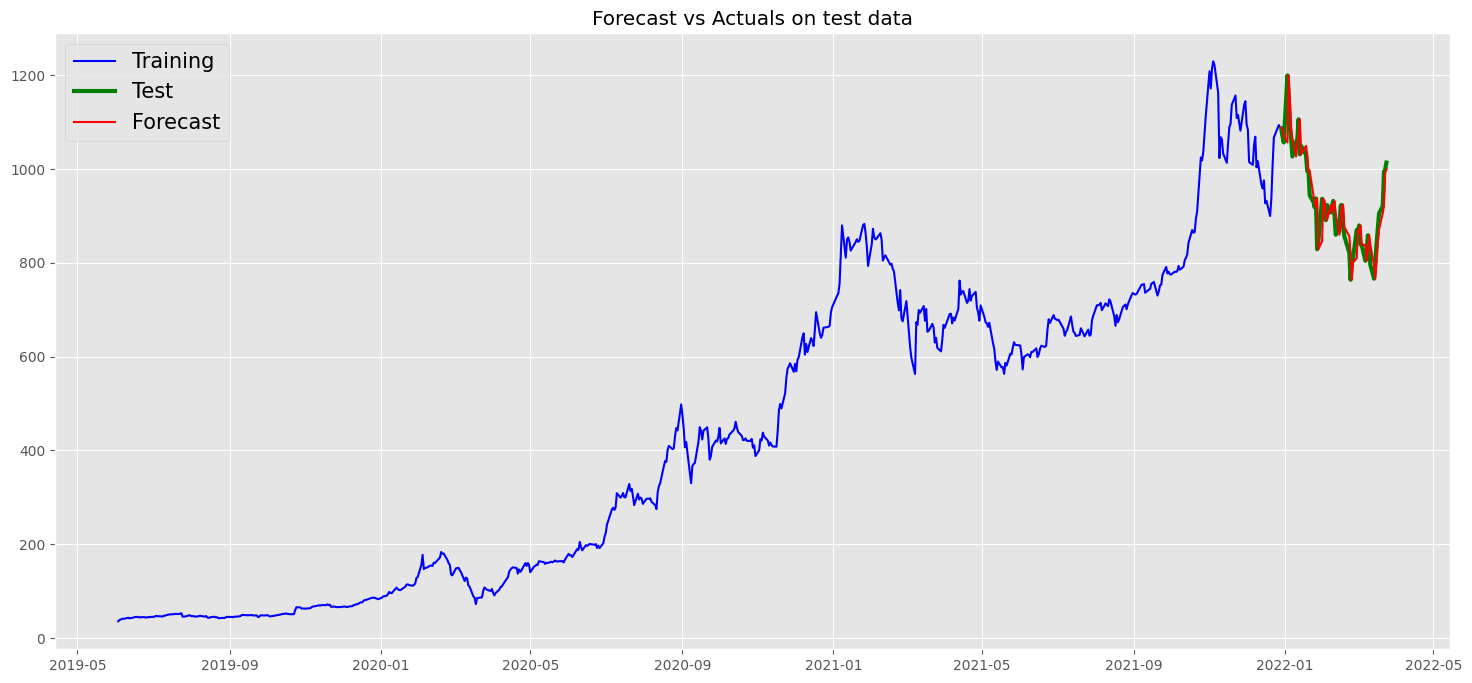

In [1379]:
#forecast value with actual test data
plt.figure(figsize=(18,8), dpi=100)
plt.plot(train_data['Close'], label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=15)
plt.show()

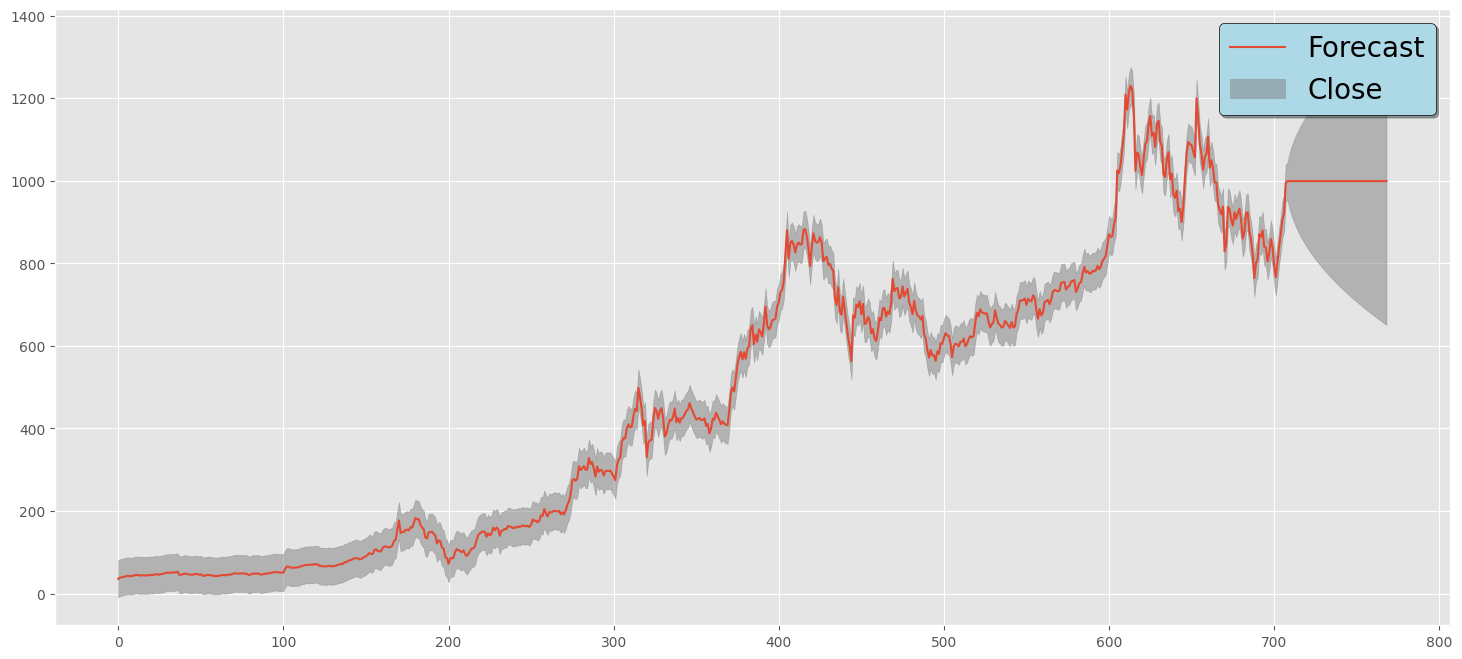

In [1380]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [1381]:
#SARIMA -p, d, q, P, Q, D,s

history = [x for x in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 41.69683055649417


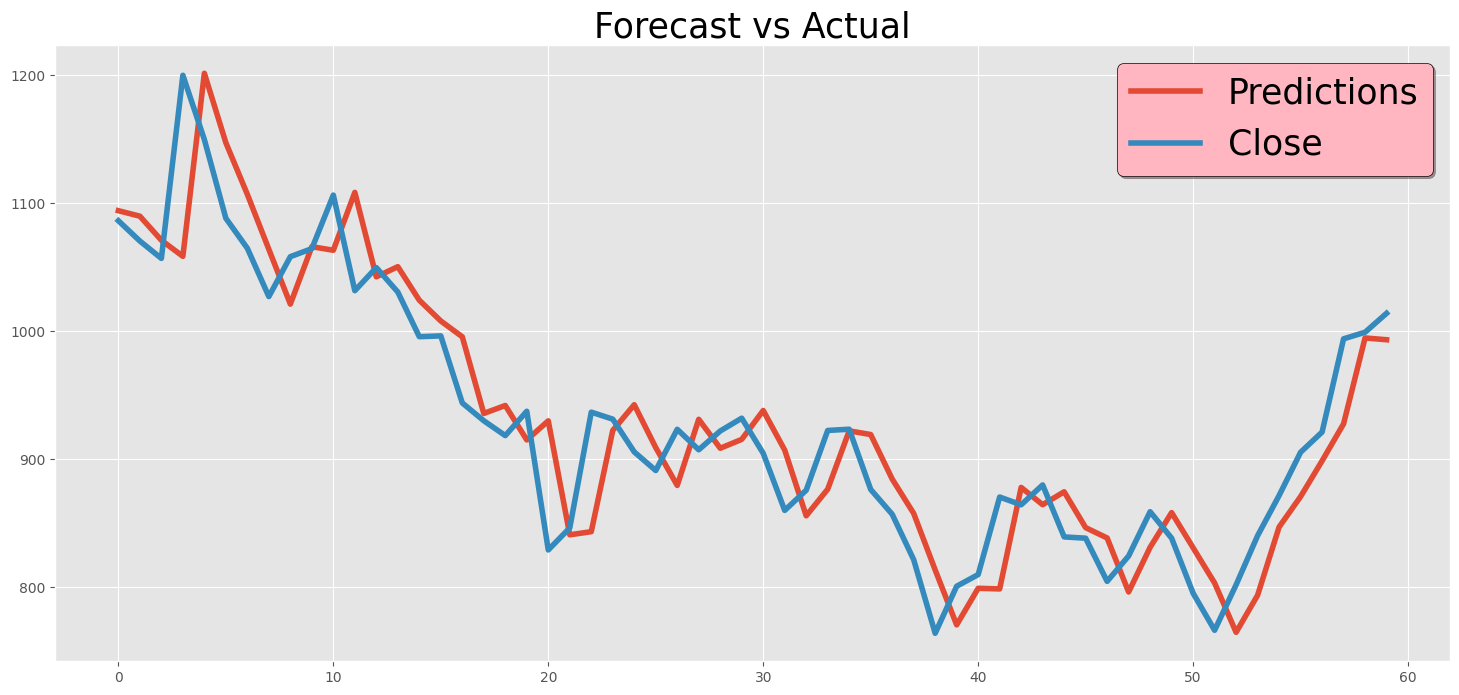

In [1382]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')